# GWP 3 Submission

Group No - 846

- Primary Theme - Statistical Related Risk: Volatility & Statistical Related Risk: Correlation
- Secondary Theme - Fallout: Model Failure & Crises

## Section - 1 (Theoretical Set up)

1. Statistical Related Risk: Volatility

Volatility, also called Standard Deviation, is a measure of dispersion of data points with respect to its mean. It is square root of Variance.


$$ \sigma^{2}(X) = \frac{\Sigma (X-E(X))^{2}}{n-1}$$

$$ \sigma(X)= \sqrt( \frac{\Sigma (X-E(X))^{2}}{n-1}) )$$

Covariance is defined as measure of whether two variables move inline with each other or Anti to each other. It can range from minus infinity to plus infinity.

$$ Covar(X,Y) = \frac{\Sigma (X-E(X))*(Y-E(Y))}{n-1}$$


2. Statistical Related Risk: Correlation

Correlation is defined as the strength of linear relationship between two variables whith an assumption that both variables have a linear relationship. It ranges from +1 to -1. The value of 0 corresponds to no correlation.


$$
\rho = \frac {Covar(X,Y)} {\sigma(X)*\sigma(Y)}
$$

As an example for both Correlation and Volatility, we will illustrate Fama French 3 Factor model.  

Fama French 3 Factor model tries to model returns based on three factors:
- Benchmark excess returns over the risk free rate
- Size premium
- Value premium

$$
r_{it}-r_{ft} = \alpha + \beta_{1}*(r_{mt} - f_{ft}) + \beta_{2}*SMB_{t}
+ \beta_{3}*HML_{t} + \epsilon_{it}$$

Here, 
- SMB is Size premium
- HML is value premium

## Section 2 - Illustrations

### 1. Fama French 3 Factor Model

In [2]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import scipy.stats as s

%matplotlib inline

1. Data Importing and Cleaning

In [4]:
#1st dataset
ind_port=pd.read_csv('./Industry_Portfolios.csv')

ind_port.head(20)

,This file was created by CMPT_IND_RETS using the 202205 CRSP database.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,It contains value- and equal-weighted returns ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,The portfolios are constructed at the end of J...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,The annual returns are from January to December.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Missing data are indicated by -99.99 or -999.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Average Value Weighted Returns -- Monthly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Extracting the value weighted returns monthly data
value_wted_returns=ind_port.iloc[11:1162,:]
value_wted_returns.columns=['Time', 'Agric', 'Food ', 'Soda ', 'Beer ', 'Smoke', 'Toys ', 'Fun  ',
       'Books', 'Hshld', 'Clths', 'Hlth ', 'MedEq', 'Drugs', 'Chems', 'Rubbr',
       'Txtls', 'BldMt', 'Cnstr', 'Steel', 'FabPr', 'Mach ', 'ElcEq', 'Autos',
       'Aero ', 'Ships', 'Guns ', 'Gold ', 'Mines', 'Coal ', 'Oil  ', 'Util ',
       'Telcm', 'PerSv', 'BusSv', 'Hardw', 'Softw', 'Chips', 'LabEq', 'Paper',
       'Boxes', 'Trans', 'Whlsl', 'Rtail', 'Meals', 'Banks', 'Insur', 'RlEst',
       'Fin  ', 'Other']
value_wted_returns.reset_index(inplace=True)
value_wted_returns.drop(columns=['index'],inplace=True)
value_wted_returns.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12824\425753230.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  value_wted_returns.drop(columns=['index'],inplace=True)


,Time,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
0,192607,2.37,0.12,-99.99,-5.19,1.29,8.65,2.5,50.21,-0.48,...,7.7,1.92,-23.79,0.07,1.87,4.61,-0.54,2.89,-5.77,5.2
1,192608,2.23,2.68,-99.99,27.03,6.5,16.81,-0.76,42.98,-3.58,...,-2.38,4.85,5.39,-0.75,-0.13,11.83,2.57,5.3,0.32,6.76
2,192609,-0.57,1.58,-99.99,4.02,1.26,8.33,6.42,-4.91,0.73,...,-5.54,0.08,-7.87,0.25,-0.56,-1.75,0.72,-3.06,-4.81,-3.86
3,192610,-0.46,-3.68,-99.99,-3.31,1.06,-1.4,-5.09,5.37,-4.68,...,-5.08,-2.62,-15.38,-2.2,-4.11,-11.82,-4.28,-5.74,-0.94,-8.49
4,192611,6.75,6.26,-99.99,7.29,4.55,0,1.82,-6.4,-0.54,...,3.84,1.61,4.67,6.52,4.33,-2.97,3.58,2.21,5.13,4


In [6]:
value_wted_returns.shape 
#This shape corresponds to similar data in the csv file

(1151, 50)

In [7]:
#Importing and Extractying the required Fama-French Data
ff_data=pd.read_csv('./F-F_Research_Data_5_Factors_2x3.csv')
ff_data.head(20)

,This file was created by CMPT_ME_BEME_OP_INV_RETS using the 202205 CRSP database.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,The 1-month TBill return is from Ibbotson and ...,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Mkt-RF,SMB,HML,RMW,CMA,RF
3,196307,-0.39,-0.44,-0.89,0.68,-1.23,0.27
4,196308,5.07,-0.75,1.68,0.36,-0.34,0.25
5,196309,-1.57,-0.55,0.08,-0.71,0.29,0.27
6,196310,2.53,-1.37,-0.14,2.8,-2.02,0.29
7,196311,-0.85,-0.89,1.81,-0.51,2.31,0.27
8,196312,1.83,-2.07,-0.08,0.03,-0.04,0.29
9,196401,2.24,0.11,1.47,0.17,1.51,0.3


In [8]:
ff_monthly_data=ff_data.iloc[3:710,:]
ff_monthly_data.columns=['Time', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']
ff_monthly_data.head()
ff_monthly_data.reset_index(inplace=True)
ff_monthly_data.drop(columns=['index'],inplace=True)
ff_monthly_data.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12824\3190668661.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ff_monthly_data.drop(columns=['index'],inplace=True)


,Time,Mkt-RF,SMB,HML,RMW,CMA,RF
0,196307,-0.39,-0.44,-0.89,0.68,-1.23,0.27
1,196308,5.07,-0.75,1.68,0.36,-0.34,0.25
2,196309,-1.57,-0.55,0.08,-0.71,0.29,0.27
3,196310,2.53,-1.37,-0.14,2.8,-2.02,0.29
4,196311,-0.85,-0.89,1.81,-0.51,2.31,0.27


In [9]:
ff_monthly_data.shape

(707, 7)

2. Preprocessing of data

For returns dataset
- For industry portfolio data, it is explicitly given that the value of -99.99 or -999 correspond to missing data. So, in order to improve data quality we impute values(mean) these columns(industries).

In [11]:
#proportion of missing data
mask=(value_wted_returns== '-99.99') | (value_wted_returns== '-999')
mask.mean()

Time     0.000000
Agric    0.000000
Food     0.000000
Soda     0.385752
Beer     0.000000
Smoke    0.000000
Toys     0.000000
Fun      0.000000
Books    0.000000
Hshld    0.000000
Clths    0.000000
Hlth     0.448306
MedEq    0.000000
Drugs    0.000000
Chems    0.000000
Rubbr    0.052129
Txtls    0.000000
BldMt    0.000000
Cnstr    0.000000
Steel    0.000000
FabPr    0.385752
Mach     0.000000
ElcEq    0.000000
Autos    0.000000
Aero     0.000000
Ships    0.000000
Guns     0.385752
Gold     0.385752
Mines    0.000000
Coal     0.000000
Oil      0.000000
Util     0.000000
Telcm    0.000000
PerSv    0.010426
BusSv    0.000000
Hardw    0.000000
Softw    0.406603
Chips    0.000000
LabEq    0.000000
Paper    0.031277
Boxes    0.000000
Trans    0.000000
Whlsl    0.000000
Rtail    0.000000
Meals    0.000000
Banks    0.000000
Insur    0.000000
RlEst    0.000000
Fin      0.000000
Other    0.000000
dtype: float64

In [12]:
impute_col=['Rubbr','PerSv','Paper','Soda ', 'Hlth ', 'FabPr', 'Guns ', 'Gold ','Softw']

value_wted_returns[value_wted_returns.columns[1:]]=value_wted_returns[value_wted_returns.columns[1:]].astype(float)
value_wted_returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1151 non-null   object 
 1   Agric   1151 non-null   float64
 2   Food    1151 non-null   float64
 3   Soda    1151 non-null   float64
 4   Beer    1151 non-null   float64
 5   Smoke   1151 non-null   float64
 6   Toys    1151 non-null   float64
 7   Fun     1151 non-null   float64
 8   Books   1151 non-null   float64
 9   Hshld   1151 non-null   float64
 10  Clths   1151 non-null   float64
 11  Hlth    1151 non-null   float64
 12  MedEq   1151 non-null   float64
 13  Drugs   1151 non-null   float64
 14  Chems   1151 non-null   float64
 15  Rubbr   1151 non-null   float64
 16  Txtls   1151 non-null   float64
 17  BldMt   1151 non-null   float64
 18  Cnstr   1151 non-null   float64
 19  Steel   1151 non-null   float64
 20  FabPr   1151 non-null   float64
 21  Mach    1151 non-null   float64
 22  

C:\Users\Admin\AppData\Local\Temp\ipykernel_12824\1382093669.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  value_wted_returns[value_wted_returns.columns[1:]]=value_wted_returns[value_wted_returns.columns[1:]].astype(float)


In [13]:
#impute with mean values
mask=(value_wted_returns!=-99.99)&(value_wted_returns!=-999)
impute_values=value_wted_returns[impute_col][mask].dropna().mean()
impute_values

Rubbr    1.043937
PerSv    0.621921
Paper    0.904520
Soda     1.124394
Hlth     1.010283
FabPr    0.830693
Guns     1.284961
Gold     0.925449
Softw    1.041669
dtype: float64

In [14]:
#impute values
for i in impute_col:
    value_wted_returns[i]=np.where(((value_wted_returns[i]==-99.99)|(value_wted_returns['Rubbr']==-999)),
                                   impute_values[i],value_wted_returns[i])

C:\Users\Admin\AppData\Local\Temp\ipykernel_12824\2214042178.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  value_wted_returns[i]=np.where(((value_wted_returns[i]==-99.99)|(value_wted_returns['Rubbr']==-999)),


- For F-F dataset, we don't need any particular preprocessing except converting the data type to float(except the 'Time' column).
- Furthermore, we do not disturb the 'Time' column format as they are same across all dataframes.

3. Analysis

In [16]:
#Industry wise average returns
ri_bar=value_wted_returns.drop(columns=['Time']).mean().sort_values()
ri_bar

Other    0.727437
FabPr    0.824516
RlEst    0.832068
Whlsl    0.842667
Telcm    0.843649
Util     0.887124
PerSv    0.912913
Trans    0.923162
Hshld    0.928323
Clths    0.938375
Steel    0.947637
Txtls    0.959652
Food     0.970565
Gold     0.976316
Agric    0.977194
Books    0.985343
Toys     0.988471
BusSv    0.994057
BldMt    1.003545
Ships    1.004353
Hlth     1.010283
Softw    1.021270
Mines    1.034205
Rtail    1.043675
Cnstr    1.043840
Oil      1.045048
Chems    1.054466
Boxes    1.064761
Meals    1.068593
Insur    1.075699
Mach     1.079201
Fin      1.089470
Coal     1.091390
Drugs    1.103110
MedEq    1.134683
Soda     1.142685
Smoke    1.145447
Banks    1.152632
LabEq    1.161633
ElcEq    1.162580
Rubbr    1.173846
Autos    1.183840
Beer     1.195864
Hardw    1.211955
Chips    1.216994
Fun      1.224196
Guns     1.230628
Paper    1.323356
Aero     1.382276
dtype: float64

<AxesSubplot:>

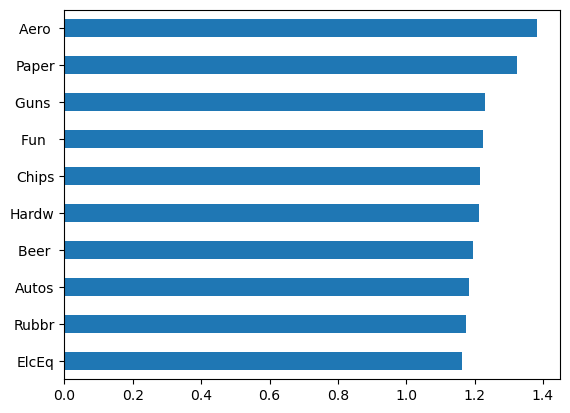

In [17]:
#Plot top 10 histogram
ri_bar.tail(10).plot(kind='barh')

<AxesSubplot:>

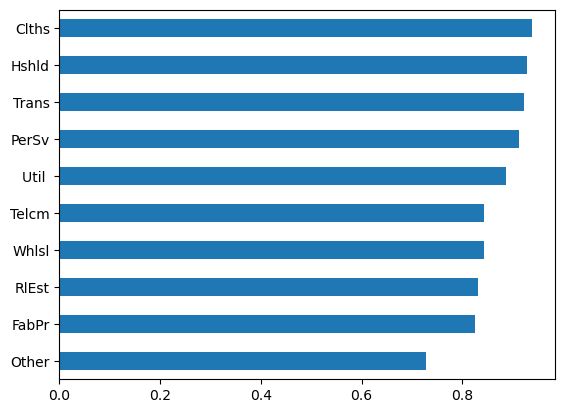

In [18]:
#Plot bottom 10 histogram
ri_bar.head(10).plot(kind='barh')

In [19]:
summary_return=value_wted_returns.describe().T
summary_return

,count,mean,std,min,25%,50%,75%,max
Agric,1151.0,0.977194,7.460563,-36.45,-3.065,0.760000,4.760,91.34
Food,1151.0,0.970565,4.753352,-27.87,-1.320,1.070000,3.405,32.63
Soda,1151.0,1.142685,4.861558,-26.26,0.050,1.124394,2.540,38.27
Beer,1151.0,1.195864,7.112490,-29.19,-2.100,1.000000,4.405,87.61
Smoke,1151.0,1.145447,5.814748,-24.93,-2.290,1.300000,4.585,33.04
Toys,1151.0,0.988471,9.902224,-43.34,-4.345,0.830000,5.825,140.45
Fun,1151.0,1.224196,9.264223,-44.28,-3.175,1.260000,5.930,69.57
Books,1151.0,0.985343,7.843385,-34.81,-2.935,0.700000,4.585,54.75
Hshld,1151.0,0.928323,5.761753,-34.97,-1.865,1.050000,4.110,58.33
Clths,1151.0,0.938375,6.143087,-30.85,-2.215,0.960000,4.055,41.40


In [20]:
#Inter-quartile Range
iqr=summary_return['75%']-summary_return['25%']
iqr.sort_values()

Hlth      1.530
Soda      2.490
Guns      2.575
FabPr     3.265
Softw     3.400
Gold      4.100
Food      4.725
Telcm     4.765
Util      5.295
Hshld     5.975
Drugs     6.060
Clths     6.270
Rtail     6.385
BusSv     6.440
Beer      6.505
Banks     6.685
Rubbr     6.750
Whlsl     6.755
Insur     6.780
Smoke     6.875
Boxes     6.890
Meals     6.905
Chems     6.905
BldMt     6.985
Oil       6.990
MedEq     7.005
Trans     7.160
Mach      7.490
Books     7.520
Paper     7.595
Other     7.615
Fin       7.755
Agric     7.825
LabEq     7.825
Mines     7.925
ElcEq     7.990
Ships     7.995
Hardw     8.035
Autos     8.110
Txtls     8.190
PerSv     8.195
RlEst     8.615
Aero      8.850
Steel     9.050
Fun       9.105
Cnstr     9.260
Chips     9.410
Toys     10.170
Coal     10.415
dtype: float64

In [199]:
#Correlation analysis
value_wted_returns.iloc[:,1:].corr()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Agric,1.000000,0.574797,0.216367,0.453961,0.420412,0.459495,0.555590,0.536256,0.534848,0.434004,...,0.552172,0.603829,0.547372,0.559494,0.533303,0.527050,0.568157,0.490012,0.592978,0.521455
Food,0.574797,1.000000,0.412846,0.686322,0.655354,0.542316,0.668993,0.647818,0.774869,0.626494,...,0.701029,0.687611,0.676131,0.779244,0.705775,0.697784,0.733186,0.595841,0.700761,0.647417
Soda,0.216367,0.412846,1.000000,0.343991,0.333403,0.254821,0.327058,0.313627,0.395066,0.421101,...,0.363503,0.318683,0.318357,0.377232,0.416439,0.359733,0.314577,0.304714,0.314659,0.328630
Beer,0.453961,0.686322,0.343991,1.000000,0.454063,0.607033,0.617797,0.547501,0.661448,0.509862,...,0.576661,0.608854,0.664149,0.646874,0.635849,0.598558,0.596377,0.548577,0.617949,0.572498
Smoke,0.420412,0.655354,0.333403,0.454063,1.000000,0.384018,0.473776,0.441969,0.547059,0.429566,...,0.500939,0.480009,0.482531,0.513657,0.484112,0.508700,0.513990,0.407512,0.478121,0.490388
Toys,0.459495,0.542316,0.254821,0.607033,0.384018,1.000000,0.615032,0.581242,0.559627,0.538045,...,0.532622,0.621066,0.630704,0.603888,0.639390,0.548438,0.488532,0.547971,0.578668,0.578241
Fun,0.555590,0.668993,0.327058,0.617797,0.473776,0.615032,1.000000,0.649313,0.687210,0.620490,...,0.657333,0.722917,0.734288,0.744741,0.727745,0.675223,0.701952,0.663460,0.763490,0.679032
Books,0.536256,0.647818,0.313627,0.547501,0.441969,0.581242,0.649313,1.000000,0.644374,0.637933,...,0.645901,0.708477,0.664899,0.687990,0.646935,0.629945,0.600113,0.641775,0.691074,0.612758
Hshld,0.534848,0.774869,0.395066,0.661448,0.547059,0.559627,0.687210,0.644374,1.000000,0.596720,...,0.712487,0.683291,0.686742,0.763569,0.692310,0.677266,0.695197,0.586625,0.702283,0.671501
Clths,0.434004,0.626494,0.421101,0.509862,0.429566,0.538045,0.620490,0.637933,0.596720,1.000000,...,0.645266,0.663292,0.654877,0.739077,0.680269,0.607806,0.571042,0.618484,0.644126,0.622855


<AxesSubplot:>

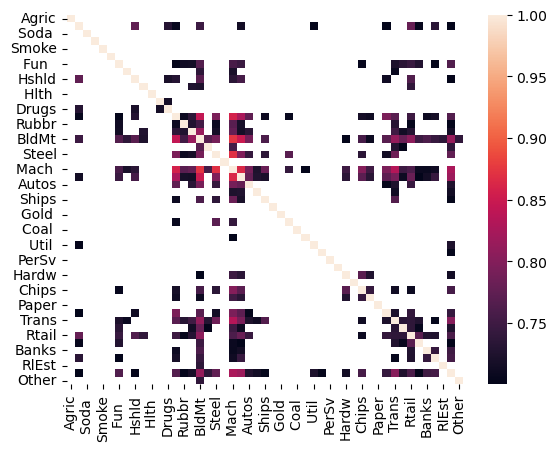

In [194]:
#Only cases with absolute correlation greater than or equal to 0.7 
sns.heatmap(value_wted_returns.iloc[:,1:].corr()[(value_wted_returns.iloc[:,1:].corr()>=0.7)|(value_wted_returns.iloc[:,1:].corr()<=-0.7)])

<AxesSubplot:>

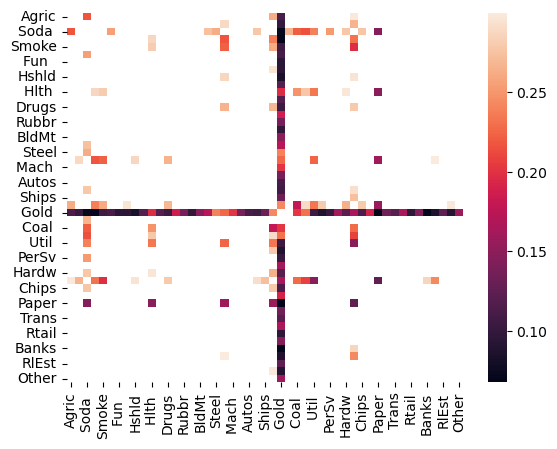

In [38]:
#Only cases with absolute correlation less than or equals to 0.3
sns.heatmap(value_wted_returns.iloc[:,1:].corr()[(value_wted_returns.iloc[:,1:].corr()>=-0.3)&(value_wted_returns.iloc[:,1:].corr()<=0.3)])

In [39]:
#Conversion to time-series data
l=[]
for i in value_wted_returns.columns[1:]:
    df_temp=pd.DataFrame()
    df_temp['Time']=value_wted_returns['Time']
    df_temp['Industry']=i
    df_temp['Industry_Returns']=value_wted_returns[i]
    l.append(df_temp)
df_ts=pd.concat(l,axis=0)
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56399 entries, 0 to 1150
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time              56399 non-null  object 
 1   Industry          56399 non-null  object 
 2   Industry_Returns  56399 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.7+ MB


In [40]:
#Our data gets further reduced in size due to missing data for certain dates in either of the two tables
df_fin=pd.merge(df_ts,ff_monthly_data,how='inner',on='Time')
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34643 entries, 0 to 34642
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time              34643 non-null  object 
 1   Industry          34643 non-null  object 
 2   Industry_Returns  34643 non-null  float64
 3   Mkt-RF            34643 non-null  object 
 4   SMB               34643 non-null  object 
 5   HML               34643 non-null  object 
 6   RMW               34643 non-null  object 
 7   CMA               34643 non-null  object 
 8   RF                34643 non-null  object 
dtypes: float64(1), object(8)
memory usage: 2.6+ MB


In [41]:
#Excess return calculations

df_fin[df_fin.columns[3:]]=df_fin[df_fin.columns[3:]].astype(float)
df_fin['re_bar']=df_fin['Industry_Returns']-df_fin['RF']
df_fin.head(10)

,Time,Industry,Industry_Returns,Mkt-RF,SMB,HML,RMW,CMA,RF,re_bar
0,196307,Agric,3.04,-0.39,-0.44,-0.89,0.68,-1.23,0.27,2.77
1,196307,Food,-0.46,-0.39,-0.44,-0.89,0.68,-1.23,0.27,-0.73
2,196307,Soda,2.57,-0.39,-0.44,-0.89,0.68,-1.23,0.27,2.30
3,196307,Beer,-2.19,-0.39,-0.44,-0.89,0.68,-1.23,0.27,-2.46
4,196307,Smoke,-2.54,-0.39,-0.44,-0.89,0.68,-1.23,0.27,-2.81
5,196307,Toys,-5.07,-0.39,-0.44,-0.89,0.68,-1.23,0.27,-5.34
6,196307,Fun,-0.70,-0.39,-0.44,-0.89,0.68,-1.23,0.27,-0.97
7,196307,Books,-0.07,-0.39,-0.44,-0.89,0.68,-1.23,0.27,-0.34
8,196307,Hshld,-0.15,-0.39,-0.44,-0.89,0.68,-1.23,0.27,-0.42
9,196307,Clths,-0.67,-0.39,-0.44,-0.89,0.68,-1.23,0.27,-0.94


In [44]:
#Industry wise calculation
risk_return_df=df_fin.groupby('Industry').agg({'Industry_Returns':['mean','std']})
risk_return_df.head(10)

Industry_Returns          
                     mean       std
Industry                           
Aero             1.160594  6.873825
Agric            1.042801  6.401401
Autos            1.015502  7.435402
Banks            0.947836  6.012328
Beer             1.117949  5.086936
BldMt            1.026040  6.191058
Books            0.925502  5.939802
Boxes            0.995615  5.511701
BusSv            1.026294  5.669321
Chems            0.948741  5.580444

In [45]:
risk_return_df.shape

(49, 2)

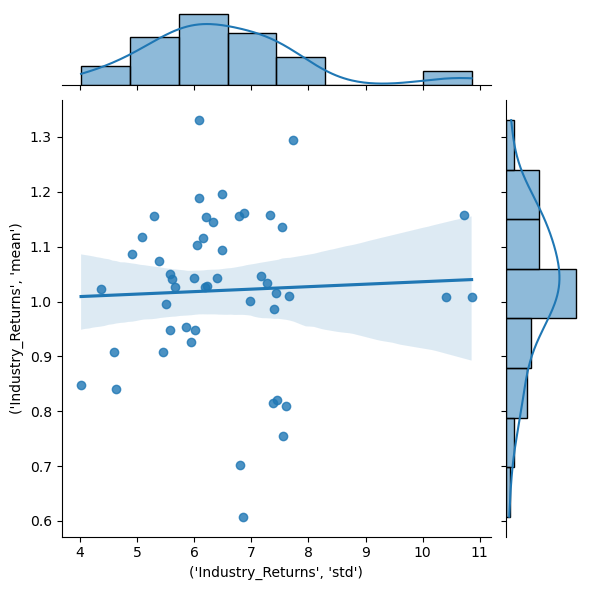

In [46]:
sns.jointplot(y=risk_return_df[('Industry_Returns', 'mean')],x=risk_return_df[('Industry_Returns', 'std')],kind='reg')

Traditional Risk-Return paradigm states that risk and the corresponding return go hand in hand, that is, higher the risk corresponds to higher reward. We can clearly observe quite a lot of deviation from the ideal case. This deviation can be attributed to the long time horizon and the different natures of all the different industries and their corresponding market circumstances. All in all, we observe a positive slope which is in agreement with the ideal case dispite having such a diverse data sample.

4. FF 3 factor model's industry wise application 

a) Industry wise

In [47]:
l=[]
for i in df_fin['Industry'].unique():
    df_temp=df_fin[df_fin['Industry']==i]
    X=df_fin[df_fin['Industry']==i][['Mkt-RF','HML','SMB']]
    y=df_fin[df_fin['Industry']==i]['re_bar']
    model=LinearRegression()
    model.fit(X,y)
    l.append([i,model.intercept_,model.coef_[0],model.coef_[1],model.coef_[2]])

In [48]:
output_parameters=pd.DataFrame(l,columns=['Industry','alpha','beta_mke-rf','beta_hml','beta_smb'])
output_parameters.set_index('Industry',inplace=True)
output_parameters.head(10)

,alpha,beta_mke-rf,beta_hml,beta_smb
Industry,,,,
Agric,0.123052,0.792252,0.054621,0.419211
Food,0.224902,0.728281,0.190194,-0.158193
Soda,0.274125,0.866519,0.205056,-0.161487
Beer,0.319567,0.777741,0.081535,-0.130624
Smoke,0.532657,0.731028,0.249511,-0.249968
Toys,-0.295823,1.093581,0.035539,0.543507
Fun,0.106524,1.273701,0.003684,0.473940
Books,-0.178282,1.063937,0.243308,0.293418
Hshld,0.123085,0.818153,-0.017683,-0.151367


We test for which all industries do we have a significant $\alpha$ value.

Statistical test for positive alpha values: 
    $$H_{o} : \alpha <= 0$$
    $$H_{a} : \alpha > 0$$
    

We do a t-test for above hypothesis. It will be a right tailed test at 95% confidence interval.

In [50]:
df_t_test=output_parameters['alpha'].to_frame()
df_t_test['t_score']=(df_t_test['alpha']-df_t_test['alpha'].mean())/(df_t_test['alpha'].std())
df_t_test

,alpha,t_score
Industry,,
Agric,0.123052,0.576462
Food,0.224902,0.997931
Soda,0.274125,1.201621
Beer,0.319567,1.389671
Smoke,0.532657,2.271469
Toys,-0.295823,-1.156911
Fun,0.106524,0.508066
Books,-0.178282,-0.670509
Hshld,0.123085,0.576595


In [51]:
t_stat_critical_value=s.t.ppf(q=0.95,df=48)
t_stat_critical_value

1.6772241953450393

In [200]:
df_t_test['Reject_Ho']=np.where((df_t_test['t_score']>t_stat_critical_value)|(df_t_test['t_score']<-t_stat_critical_value),1,0)
df_t_test[df_t_test['Reject_Ho']==1]

,alpha,t_score,Reject_Ho
Industry,,,
Smoke,0.532657,2.271469,1
Drugs,0.409976,1.763794,1
Steel,-0.483452,-1.933346,1
RlEst,-0.623108,-2.511268,1
Other,-0.506653,-2.029359,1


b) Overall market

In [53]:
# R regression approach for overall market

df_2nd_pass=df_fin.groupby('Industry').mean()['re_bar']
df_2nd_pass=df_2nd_pass.sort_index()

df_final=output_parameters.sort_index()
df_final['re_bar']=df_2nd_pass
df_final.drop(columns=['alpha'],inplace=True)
df_final

,beta_mke-rf,beta_hml,beta_smb,re_bar
Industry,,,,
Aero,1.154123,0.326350,0.246603,0.796973
Agric,0.792252,0.054621,0.419211,0.679180
Autos,1.265263,0.454733,0.137214,0.651881
Banks,1.194491,0.665083,-0.119846,0.584215
Beer,0.777741,0.081535,-0.130624,0.754328
BldMt,1.199291,0.401560,0.272023,0.662419
Books,1.063937,0.243308,0.293418,0.561881
Boxes,0.977340,0.098625,-0.064160,0.631994
BusSv,1.064510,-0.129574,0.398365,0.662673


In [54]:
X=sm.add_constant(df_fin[['Mkt-RF', 'HML','SMB']])
y=df_fin['re_bar']

model=sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 re_bar   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                 1.172e+04
Date:                Tue, 07 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:45:54   Log-Likelihood:            -1.0285e+05
No. Observations:               34643   AIC:                         2.057e+05
Df Residuals:                   34639   BIC:                         2.057e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0163      0.026     -0.631      0.5

Based on above, we can say that when the whole market in considered at once, then we find that all three coefficients are significant and Market risk premium dominates the other two factors in dependent variable's sensitivity to it.

### 2. Correlation between Automobile stocks

In [235]:
import yfinance as yf
from pandas.plotting import scatter_matrix
from datetime import datetime

In [222]:
datetime.now().year

2023

In [228]:
symbol = 'TSLA'
ticker = yf.Ticker(symbol)
tesla = ticker.history(period='1y',
interval='1d',
actions=True,
auto_adjust=True)
tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-02-07 00:00:00-05:00 to 2023-02-07 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Volume        252 non-null    int64  
 5   Dividends     252 non-null    float64
 6   Stock Splits  252 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 15.8 KB


In [229]:
symbol = 'F'
ticker = yf.Ticker(symbol)
ford = ticker.history(period='1y',
interval='1d',
actions=True,
auto_adjust=True)
ford.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-02-07 00:00:00-05:00 to 2023-02-07 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Volume        252 non-null    int64  
 5   Dividends     252 non-null    float64
 6   Stock Splits  252 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 15.8 KB


In [230]:
symbol = 'GM'
ticker = yf.Ticker(symbol)
gm = ticker.history(period='1y',
interval='1d',
actions=True,
auto_adjust=True)
gm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-02-07 00:00:00-05:00 to 2023-02-07 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Volume        252 non-null    int64  
 5   Dividends     252 non-null    float64
 6   Stock Splits  252 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 15.8 KB


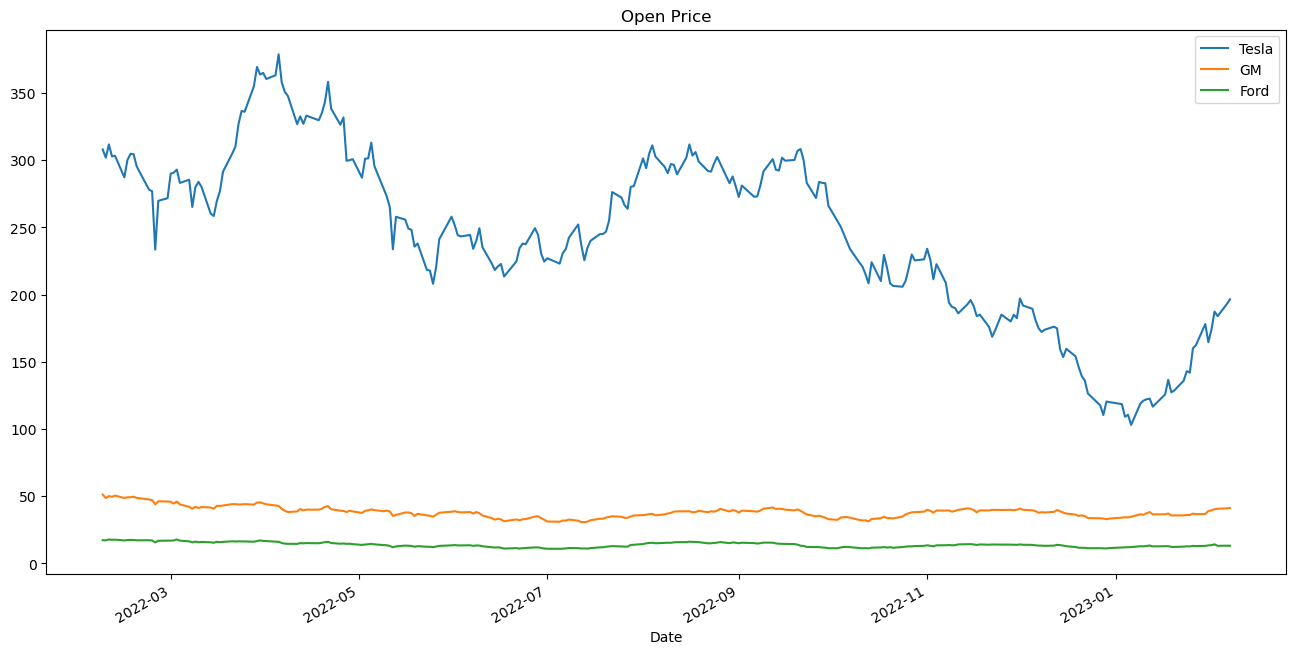

In [231]:
tesla['Open'].plot(label='Tesla',figsize=(16,8),title='Open Price')
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
plt.legend()

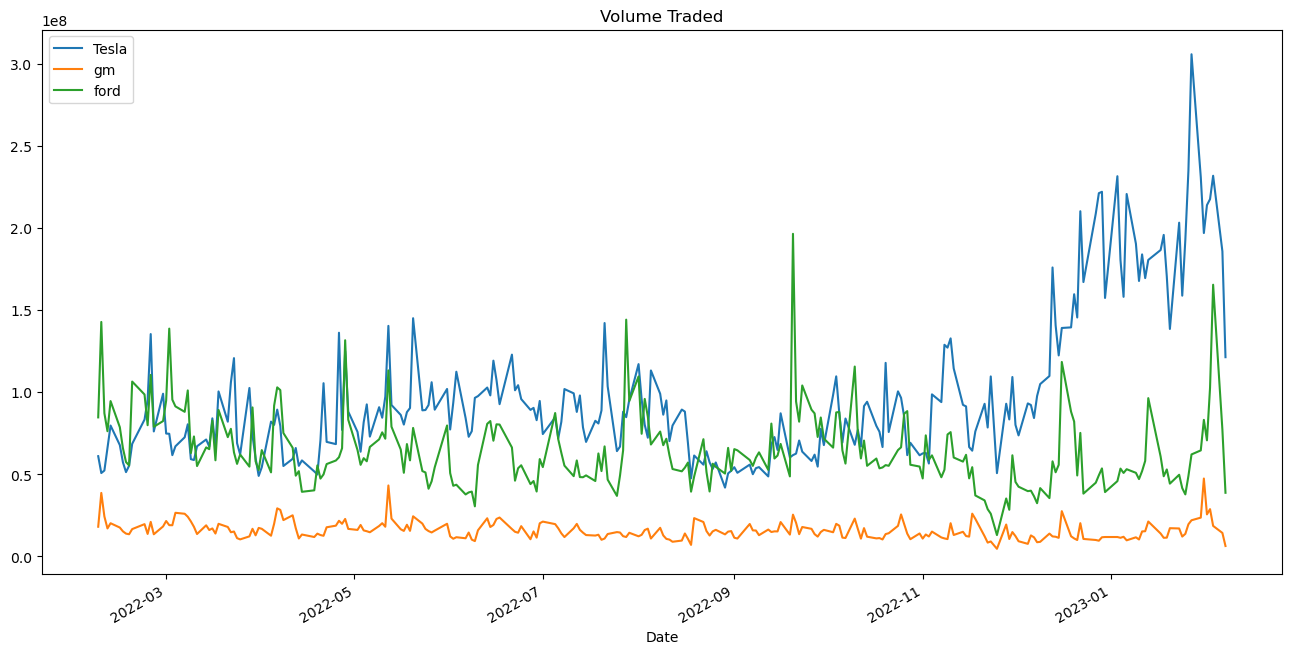

In [232]:
tesla['Volume'].plot(label='Tesla',figsize=(16,8),title='Volume Traded')
gm['Volume'].plot(label='gm')
ford['Volume'].plot(label='ford')
plt.legend()

In [233]:
tesla['Total Traded'] = tesla['Open']*tesla['Volume']
ford['Total Traded'] = ford['Open']*ford['Volume']
gm['Total Traded'] = gm['Open']*gm['Volume']

Text(0, 0.5, 'Total Traded')

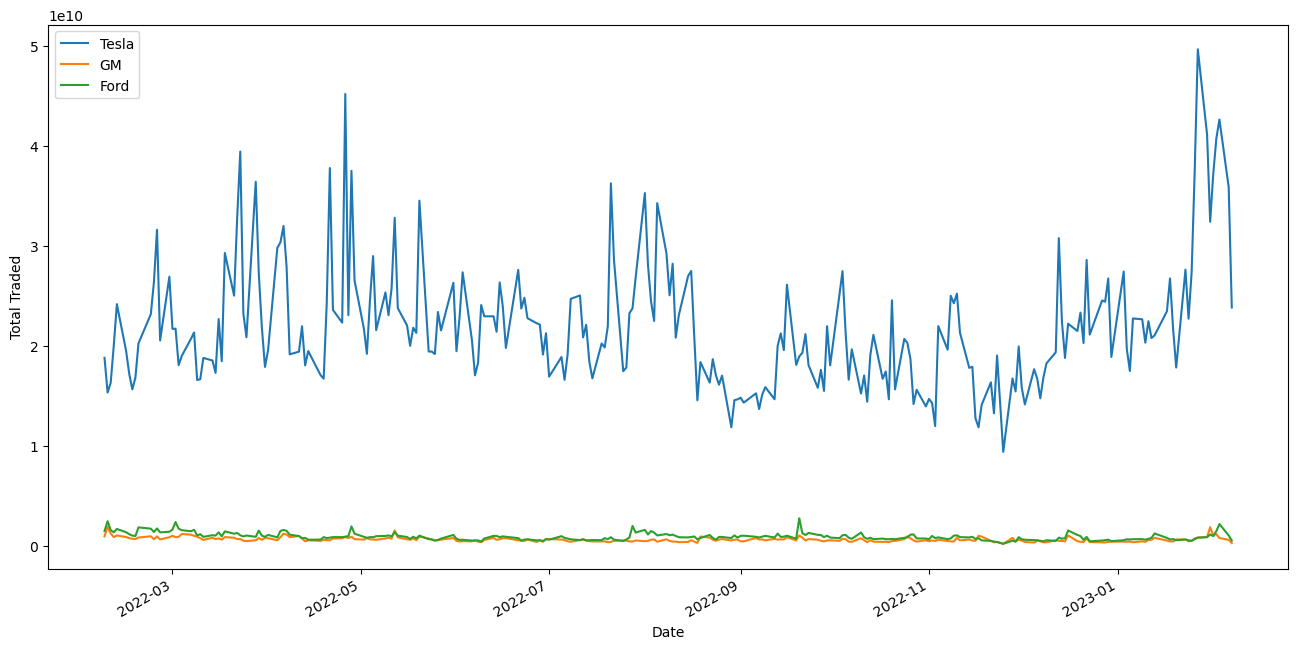

In [241]:
tesla['Total Traded'].plot(label='Tesla',figsize=(16,8))
gm['Total Traded'].plot(label='GM')
ford['Total Traded'].plot(label='Ford')
plt.legend()
plt.ylabel('Total Traded')

array([[<AxesSubplot:xlabel='Tesla Open', ylabel='Tesla Open'>,
        <AxesSubplot:xlabel='GM Open', ylabel='Tesla Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='Tesla Open'>],
       [<AxesSubplot:xlabel='Tesla Open', ylabel='GM Open'>,
        <AxesSubplot:xlabel='GM Open', ylabel='GM Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='GM Open'>],
       [<AxesSubplot:xlabel='Tesla Open', ylabel='Ford Open'>,
        <AxesSubplot:xlabel='GM Open', ylabel='Ford Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='Ford Open'>]],
      dtype=object)

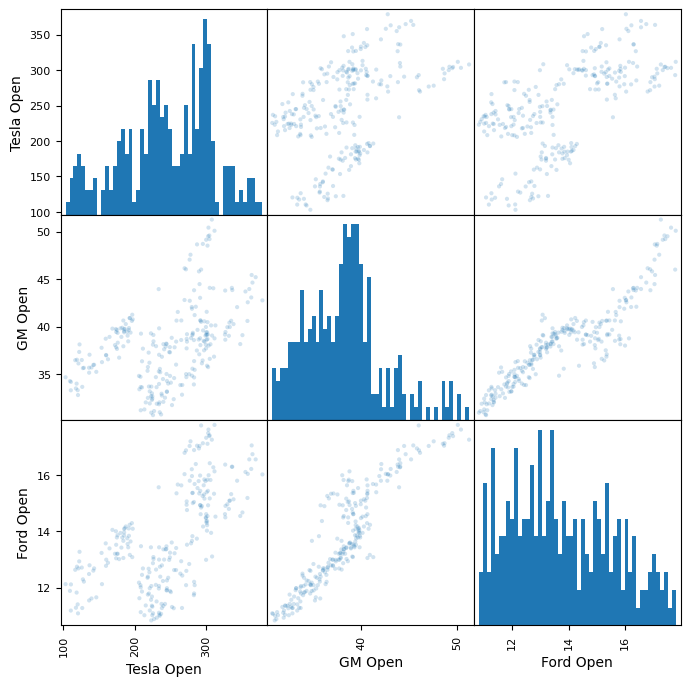

In [236]:
comparison = pd.concat([tesla['Open'],gm['Open'],ford['Open']],axis=1)
comparison.columns = ['Tesla Open','GM Open','Ford Open']

scatter_matrix(comparison,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50})

In [251]:
comparison.describe().loc['mean',:]/comparison.describe().loc['std',:]

Tesla Open    3.900512
GM Open       9.155948
Ford Open     7.624141
dtype: float64

In [237]:
tesla['Open'].corr(ford['Open'])

0.6315345206188344

In [238]:
tesla['Open'].corr(gm['Open'])

0.4539597606104765

In [239]:
gm['Open'].corr(ford['Open'])

0.9065758928982761

In [255]:
comparison_2 = pd.concat([tesla['Close'],gm['Close'],ford['Close']],axis=1)
comparison_2.columns = ['Tesla Close','GM Close','Ford Close']

ret=comparison_2.pct_change().dropna()
ret.describe()

,Tesla Close,GM Close,Ford Close
count,251.000000,251.000000,251.000000
mean,-0.000914,-0.000459,-0.000671
std,0.042503,0.027837,0.029467
min,-0.122422,-0.080749,-0.123242
25%,-0.025651,-0.019388,-0.020458
50%,0.000974,0.000985,0.001460
75%,0.023823,0.017643,0.018458
max,0.110002,0.089139,0.085209


array([[<AxesSubplot:xlabel='Tesla Close', ylabel='Tesla Close'>,
        <AxesSubplot:xlabel='GM Close', ylabel='Tesla Close'>,
        <AxesSubplot:xlabel='Ford Close', ylabel='Tesla Close'>],
       [<AxesSubplot:xlabel='Tesla Close', ylabel='GM Close'>,
        <AxesSubplot:xlabel='GM Close', ylabel='GM Close'>,
        <AxesSubplot:xlabel='Ford Close', ylabel='GM Close'>],
       [<AxesSubplot:xlabel='Tesla Close', ylabel='Ford Close'>,
        <AxesSubplot:xlabel='GM Close', ylabel='Ford Close'>,
        <AxesSubplot:xlabel='Ford Close', ylabel='Ford Close'>]],
      dtype=object)

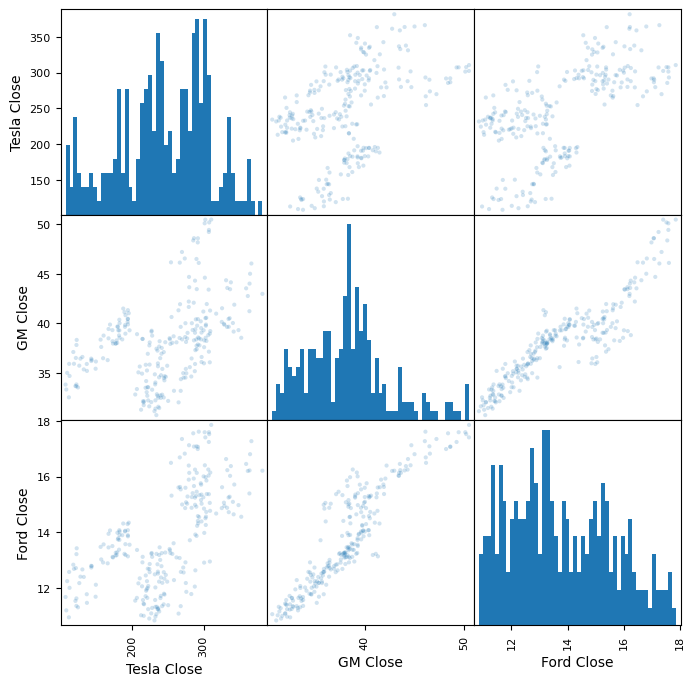

In [256]:
scatter_matrix(comparison_2,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50})